### Introduction
<hr>

The Cat vs. Dog classification deep learning project aims to develop an intelligent algorithm capable of distinguishing between images of cats and dogs. Utilizing state-of-the-art deep learning techniques, this project leverages Convolutional Neural Networks (CNNs) to extract intricate features from the input images. By employing a vast dataset of labeled cat and dog images, the model is trained to learn distinctive patterns and characteristics that differentiate the two classes. The ultimate objective is to achieve high accuracy in predicting unseen images, enabling automated classification of cats and dogs with minimal error. This project holds significant practical applications in various fields, including image recognition, surveillance, and pet-related industries.italicized text

### Table of Content
<hr>

- [Imports](#1)
- [Generators](#2)
- [Normalize](#3)
- [CNN Model](#4)
- [Data Augmentation](#5)
- [Testing](#6)

### Imports <a name="1"></a>
<hr>

In [1]:
import zipfile
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
import pickle

from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [2]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [3]:
! kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:07<00:00, 313MB/s]
100% 1.06G/1.06G [00:07<00:00, 152MB/s]


In [4]:
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip")
zip_ref.extractall("/content")
zip_ref.close()

### Generators  <a name="2"></a>
<hr>

In [5]:
# I'll be using generators here because its divides data into batch and much easies for RAM to process and complete task consecutively.
# However, we can also use os library to load the data but it will lead huge consumption of resources(RAM) because of having large dataset
# using generator funcyion from keras

train_data = keras.utils.image_dataset_from_directory(
    directory =  "train", # path of train file
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256, 256)
)

validation_data = keras.utils.image_dataset_from_directory(
    directory =  "test", # path of test file
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256, 256)
)

# The following outcome is in numpy array. For instance, all the data are in range of [0:255], whereas further we need data between 0 to 1
# So further i'll normalize the data so that i'll get data between 0 to 1

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


### Normalize <a name= "3"></a>
<hr>

In [6]:
# Creating function for normalizing

def Normalize(image, label):
    image = tf.cast(image/255, tf.float32)
    return image, label

train_data = train_data.map(Normalize)
validation_data = validation_data.map(Normalize)

### CNN Model <a name="4"></a>
<hr>

In [ ]:
# Creating CNN model
model = Sequential()

# Restructuing mdoel
model.add(Conv2D(
    32,
    kernel_size = (3, 3),
    padding = "valid",
    activation = "relu",
    input_shape = (256, 256, 3)
))

# Batch normalization
model.add(BatchNormalization())

# Pooling layer
model.add(MaxPooling2D(
    pool_size = (2, 2),
    padding = "valid",
    strides = 2
))

# Restructuing mdoel 2
model.add(Conv2D(
    64,
    kernel_size = (3, 3),
    padding = "valid",
    activation = "relu",

))

# Batch normalization
model.add(BatchNormalization())

# Pooling layer 2
model.add(MaxPooling2D(
    pool_size = (2, 2),
    padding = "valid",
    strides = 2
))


# Restructuing mdoel 3
model.add(Conv2D(
    128,
    kernel_size = (3, 3),
    padding = "valid",
    activation = "relu",

))

# Batch normalization
model.add(BatchNormalization())

# Pooling layer 3
model.add(MaxPooling2D(
    pool_size = (2, 2),
    padding = "valid",
    strides = 2
))

# Flatting
model.add(Flatten())

# Dense layer
model.add(Dense(
    128,
    activation = "relu"
))

# Dense layer 2
model.add(Dense(
    64,
    activation = "relu"
))

# Dense layer 3
model.add(Dense(
    1,
    activation = "sigmoid"
))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
# Compilig CNN model
model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

In [ ]:
history = model.fit(
    train_data,
    epochs = 10,
    validation_data = validation_data
)

Epoch 1/10
625/625 [==============================] - 86s 111ms/step - loss: 1.0974 - accuracy: 0.6622 - val_loss: 0.5797 - val_accuracy: 0.7054
Epoch 2/10
625/625 [==============================] - 70s 111ms/step - loss: 0.5103 - accuracy: 0.7627 - val_loss: 0.7065 - val_accuracy: 0.6654
Epoch 3/10
625/625 [==============================] - 69s 110ms/step - loss: 0.4308 - accuracy: 0.8070 - val_loss: 0.6539 - val_accuracy: 0.6638
Epoch 4/10
625/625 [==============================] - 70s 111ms/step - loss: 0.3294 - accuracy: 0.8598 - val_loss: 0.7915 - val_accuracy: 0.6976
Epoch 5/10
625/625 [==============================] - 69s 109ms/step - loss: 0.2457 - accuracy: 0.8982 - val_loss: 0.7744 - val_accuracy: 0.7572
Epoch 6/10
625/625 [==============================] - 71s 114ms/step - loss: 0.1638 - accuracy: 0.9363 - val_loss: 0.6418 - val_accuracy: 0.7796
Epoch 7/10
625/625 [==============================] - 69s 110ms/step - loss: 0.1092 - accuracy: 0.9607 - val_loss: 0.7033 - val_ac

### Accuracy Outcome
<hr>

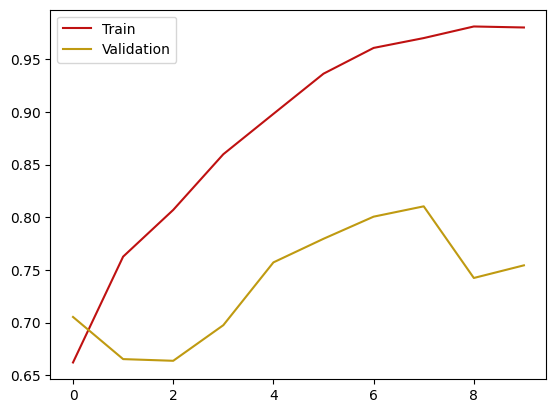

In [ ]:
# Plotting Training Accuracy & Validation accuracy
plt.plot(history.history["accuracy"],
         color = "#bf1111",
         label = "Train")

plt.plot(history.history["val_accuracy"],
         color = "#bf9a11",
         label = "Validation")
plt.legend()
plt.show()



### Loss Outcome
<hr>

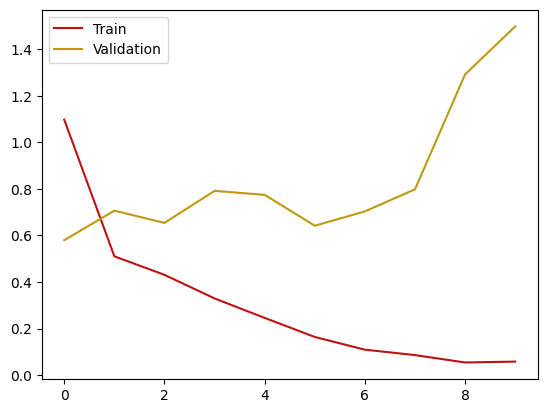

In [ ]:
# Plotting Training Loss & Validation loss
plt.plot(history.history["loss"],
         color = "#bf1111",
         label = "Train")

plt.plot(history.history["val_loss"],
         color = "#bf9a11",
         label = "Validation")
plt.legend()
plt.show()


### Data Augmentation <a name = "7"></a>
<hr>

In [7]:
batch_size = 16

# Initialising the ImageDataGenerator class.
# We will pass in the augmentation parameters in the constructor.
datagen = ImageDataGenerator(
        rescale = 1./225,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./225)

train_generator = datagen.flow_from_directory(
    "/content/train",
    target_size = (150, 150),
    batch_size = batch_size,
    class_mode = "binary"
)

validation_generator = datagen.flow_from_directory(
    "/content/test",
    target_size = (150, 150),
    batch_size = batch_size,
    class_mode = "binary"
)



Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [8]:
# Creating CNN model
model = Sequential()

# Restructuing mdoel
model.add(Conv2D(
    32,
    kernel_size = (3, 3),
    padding = "valid",
    activation = "relu",
    input_shape = (150, 150, 3)
))

# Batch normalization
model.add(BatchNormalization())

# Pooling layer
model.add(MaxPooling2D(
    pool_size = (2, 2),
    padding = "valid",
    strides = 2
))

# Restructuing mdoel 2
model.add(Conv2D(
    32,
    kernel_size = (3, 3),
    padding = "valid",
    activation = "relu",

))

# Batch normalization 2
model.add(BatchNormalization())

# Pooling layer 2
model.add(MaxPooling2D(
    pool_size = (2, 2),
    padding = "valid",
    strides = 2
))


# Restructuing mdoel 3
model.add(Conv2D(
    64,
    kernel_size = (3, 3),
    padding = "valid",
    activation = "relu",

))

# Batch normalization 3
model.add(BatchNormalization())

# Pooling layer 3
model.add(MaxPooling2D(
    pool_size = (2, 2),
    padding = "valid",
    strides = 2
))

# Flatting
model.add(Flatten())

# Dense layer
model.add(Dense(
    64,
    activation = "relu"
))

# Droupout
model.add(Dropout(0.5))

# Dense layer 2
model.add(Dense(
    1,
    activation = "sigmoid"
))


In [9]:
# Compiling Data augmentation technique
model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

In [10]:
history_2 = model.fit_generator(
    train_generator,
    steps_per_epoch = 20000 // batch_size,
    epochs = 25,
    validation_data = validation_generator,
    validation_steps = 5000 // batch_size
)

<ipython-input-10-3e02c5bac90a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_2 = model.fit_generator(


Epoch 1/25
1250/1250 [==============================] - 211s 159ms/step - loss: 0.7101 - accuracy: 0.6184 - val_loss: 0.6102 - val_accuracy: 0.6392
Epoch 2/25
1250/1250 [==============================] - 198s 158ms/step - loss: 0.5772 - accuracy: 0.6940 - val_loss: 0.5156 - val_accuracy: 0.7528
Epoch 3/25
1250/1250 [==============================] - 197s 158ms/step - loss: 0.5142 - accuracy: 0.7414 - val_loss: 0.5217 - val_accuracy: 0.7448
Epoch 4/25
1250/1250 [==============================] - 203s 163ms/step - loss: 0.4706 - accuracy: 0.7721 - val_loss: 0.4953 - val_accuracy: 0.7624
Epoch 5/25
1250/1250 [==============================] - 199s 159ms/step - loss: 0.4371 - accuracy: 0.7998 - val_loss: 1.5660 - val_accuracy: 0.5274
Epoch 6/25
1250/1250 [==============================] - 199s 159ms/step - loss: 0.4101 - accuracy: 0.8152 - val_loss: 0.4031 - val_accuracy: 0.8153
Epoch 7/25
1250/1250 [==============================] - 201s 161ms/step - loss: 0.3911 - accuracy: 0.8295 - val_

### Accuracy Outcome
<hr>

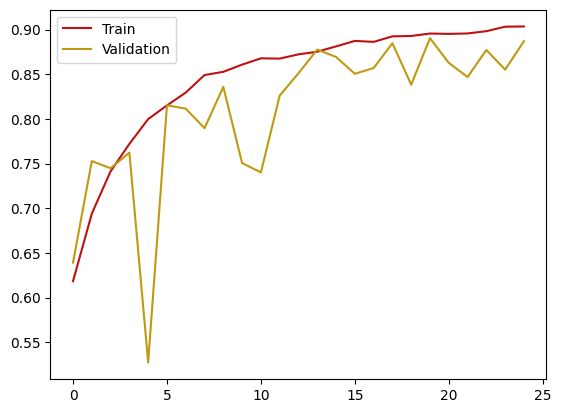

In [14]:
# Plotting Training accuracy & Validation accuracy
plt.plot(history_2.history["accuracy"],
         color = "#bf1111",
         label = "Train")

plt.plot(history_2.history["val_accuracy"],
         color = "#bf9a11",
         label = "Validation")
plt.legend()
plt.show()


### Loss Outcome
<hr>

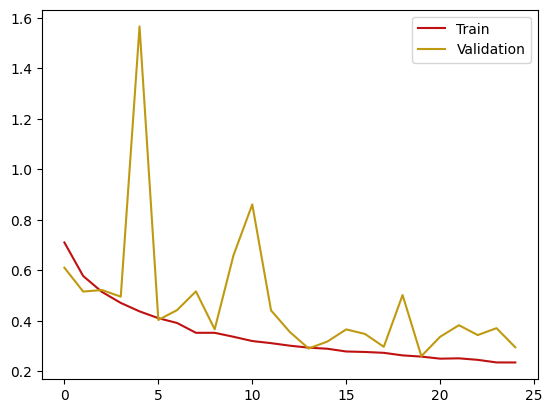

In [15]:
# Plotting Training loss & Validation loss
plt.plot(history_2.history["loss"],
         color = "#bf1111",
         label = "Train")

plt.plot(history_2.history["val_loss"],
         color = "#bf9a11",
         label = "Validation")
plt.legend()
plt.show()

### Testing <a name="8"></a>
<hr>

In [91]:
# In nutshell I am creating Predict function for cat vs dog classification
def cat_vs_dog_predict(img):
    test_img = cv2.imread(img)
    show = plt.imshow(test_img)

    shape = test_img.shape

    test_img = cv2.resize(test_img, (150, 150))
    test_input = test_img.reshape((1, 150, 150, 3))

    result = []

    if model.predict(test_input)[0][0] == 1.0:
        result.append("Dog")
    return show, shape, result

  if model.predict(test_input)[0][0] == 0.0:
    result.append("Cat")
    return show, shape, result



1/1 [==============================] - 0s 22ms/step


(<matplotlib.image.AxesImage at 0x7a739454b7c0>, (183, 275, 3), ['Dog'])

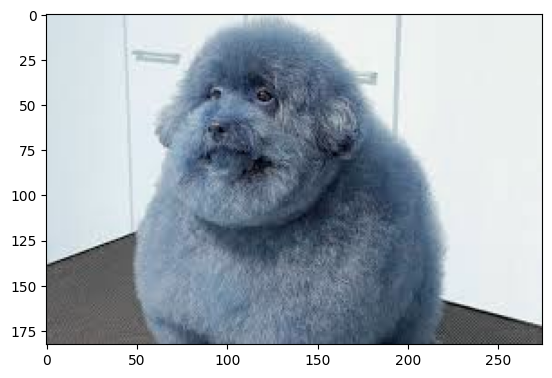

In [92]:
cat_vs_dog_predict("/content/dog4.jpeg") # Provide image or image path